# Using Reddit Comment Data to Track Shifting Political Views in the US
### by [Jay Kaiser](https://jayckaiser.github.io/)

The 2016 Presidential Election could be described in many ways, but *normal* would not be one of them. Throughout the course of the election, actions were had and statements were said by each of the candidates that in previous election cycles would have guaranteed failure for that candidate. Yet in the end, Donald Trump of the Republican party won the electoral vote and became the 45th president of the United States.

This took **many** people off-guard. Of all the candidates, Donald Trump had the least political experience and the least tactfulness, and many revelations during the course of his candidacy should have derailed his possibility for election. Historians are going to study this election for decades, due to the perhaps absurdity of it. However, despite who people thought should have won and what people thought about the candidates, a winner was chosen, and the ramifications for this choice are still not clear.

So what happened politically to allow this election to take place as it did? How did attitudes in the country change over the past few years to lead to this outcome? I posit that we can in fact track the changes in political issues and views using massive community-forum sources like Reddit. By analyzing the frequencies of key words and phrases appearing in politically-aligned subreddits, perhaps a political shift can be clearly observed. Simply by observing mentions of concepts, perhaps we can analyze how attitudes among the general public were shifting and how this shift led to Donald Trump's easy win on election night.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

I constructed a number of regular expressions whose appearance in a Reddit comment would suggest some kind of political bias. This list is not exhaustive, though in a final iteration of this project it could consist of hundreds of terms that encompass the full political spectrum of stances and issues in the United States.

In [2]:
political_words = [# 0-3 refer to Trump and the Republican Party
                   r'republicans?',
                   r'conservatives?',
                   r'trump',
                   r'make america great again|maga\b',

                   # 4-9 refer to Clinton/Sanders and the Democratic Party
                   r'democrats?',
                   r'liberals?',
                   r'hillary|clinton',
                   r'emails?',
                   r'barack|obama',
                   r'bernie|sanders',

                   # 10 & 11
                   r'america',
                   r'americans?',

                   # 12-14 are decisive issues like abortion and marijuana legalization
                   r'abortion',
                   r'marijuana',
                   r'legalization',

                   # 15-18 refer to the building of the 'wall' to keep out Mexican immigrants
                   r'immigration',
                   r'foreigners?',
                   r'mexic(o|ans?)',
                   r'(border )?wall',

                   # 19-21
                   r'gun control',
                   r'guns',
                   r'shooting',

                   # 22 & 23
                   r'gay marriage',
                   r'homosexual relations',

                   # 24-27 refer to the state of the economy
                   r'jobs?',
                   r'economy',
                   r'wall street',
                   r'recession',

                   # 28
                   r'(universal )?health (care|insurance)',

                   # 29 & 30
                   r'global warming',
                   r'climate change',

                   # 31-33 refer to Russia's involvement in the election
                   r'russia',
                   r'hacking',
                   r'spying',

                   # 34-36 refer to the perceived threat of "Radical Islamic Terrorists"
                   r'islam(ic)?',
                   r'radicalis(m|ts?)',
                   r'terroris(m|ts?)',

                   # 37 & 38
                   r'racis(m|ts?)',
                   r'black lives matter',

                   # 39-42 refer to neo-Nazis and white supremacy
                   r'white supremacists?',
                   r'(neo[- ]?)?nazis?',
                   r'white lives matter',
                   r'confederacy',
                  ]

There are a number of political subreddits where attention was focused during the election. By observing how often mentions of certain terms appear in comments on each subreddit, we can visualize their importance at that time.

In [3]:
political_subreddits = [# 0-3 are political subreddits
                        'politics',
                        'Ask_Politics',
                        'POLITIC',
    
                        # 4-7 are subreddits related to the major running candidates from both parties
                        'SandersForPresident',
                        'hillaryclinton',
                        'The_Donald',
                        'TedCruzForPresident',

                        # 8 & 9 are related to the parties themseslves
                        'democrats',
                        'Republican',
                        
                        # 10 & 11 are less popular politcal subreddits
                        'PoliticalHumor',
                        'PoliticalDiscussion',
                    
                        # 12 & 13 are popular news-related subreddits
                        'worldnews',
                        'news',
    
                        # 14 & 15 are extremely popular, non-political subreddits
                        'funny',
                        'AskReddit',
                        ]

I gathered the [full Reddit comment data](https://files.pushshift.io/reddit/comments/) for twelve months from 2014 to 2017. The months chosen were fairly arbitrary, with a few exceptions commented next to the given month below. Each month's worth of data averaged to about 30GB, and I was able to convert the JSON-like structure of each to a CSV alternative that took up only half the space. From here, the comments from each separate subreddit were extracted and written to their own CSV file to allow easy reads into memory for future processing. For the final iteration of this project, I'd like to have data for every month from 2008 when Obama was first elected as president, until today, to be able to see fully the change of trends during these nine years.

In [4]:
csv_files = ['2014-01',
            '2014-02',
            '2014-03',
            '2015-04',  # Clinton and Sanders announce their candidacy
            '2015-05',  # Huckabee, Santorum, and Carson announce their candidacy
            '2015-06',  # Trump announces his candidacy
            '2016-04',  
            '2016-09',
            '2016-10',  # the month directly prior to election month
            '2016-11',  # 2016 election month
            '2016-12',  # the month following the election
            '2017-09',  # the latest month's release of data
            ]

In [5]:
# each of the frequency DataFrames have been pickled and saved externally (to allow easy read-in for table-making)

frequencies = [pd.read_pickle("D:/Reddit/{}/{}".format(month_year, month_year + ".pkl"))
                   for month_year in csv_files]

In [6]:
frequencies[0].head()  # 2014-01

,politics,Ask_Politics,POLITIC,SandersForPresident,hillaryclinton,The_Donald,TedCruzForPresident,democrats,Republican,PoliticalHumor,PoliticalDiscussion,worldnews,news,funny,AskReddit
republicans?,0.040848,0.029469,0.010907,0.007874,0.0,0.0,0.0,0.091165,0.081994,0.029469,0.032091,0.001828,0.005169,0.000222,0.000518
conservatives?,0.018937,0.028497,0.032906,0.000000,0.0,0.0,0.0,0.016917,0.034611,0.016285,0.030684,0.004170,0.004139,0.000387,0.000731
trump,0.001170,0.000648,0.000268,0.000000,0.0,0.0,0.0,0.000940,0.006180,0.000000,0.001163,0.000645,0.000641,0.000182,0.000254
make america great again|maga\b,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000005,0.000008,0.000010,0.000017
democrats?,0.026537,0.046308,0.009732,0.027559,0.0,0.0,0.0,0.063910,0.048208,0.018612,0.032795,0.004549,0.004301,0.000197,0.000418


As can be seen from this example of frequencies from the comment data of January 2014, certain subreddits were not even in existence yet, as evident by subreddits with only zeros for all term-frequency data. Examples of these above were for *r/hillaryclinton*, *r/The_Donald*, and *r/TedCruzForPresident*, as none of these three people had yet announced or considered their candidacy this early on.

Below are some functions to help plot the data, and following these the actual graphs of comparison will begin.

In [7]:
# these represent the graphical x-coordinates for each of the dates
date_values = [1, 2, 3, 16, 17, 18, 28, 33, 34, 35, 36, 45]

# for the sake of easier legibility on the graphs, here is a simplified version of term/phrase
word_renames = [r'republican', r'conservatives', r'trump', r'make america great again', r'democrat', r'liberal', r'clinton',
                r'emails', r'obama', r'sanders', r'america', r'american', r'abortion', r'marijuana', r'legalization',
                r'immigration', r'foreigners', r'mexico', r'wall', r'gun control', r'guns', r'shooting', r'gay marriage',
                r'homosexual relations', r'jobs', r'economy', r'wall street', r'recession', r'health care', r'global warming',
                r'climate change', r'russia', r'hacking', r'spying', r'islam', r'radicalists', r'terrorism', r'racism',
                r'black lives matter', r'white supremacist', r'nazis', r'white lives matter', r'confederacy',]

In [8]:
def find_longitudinal_data_for_subreddit(subreddit):
    """
    Converts data from the form of monthly subreddit-by-word dataframes to subreddit month-by-word ones instead.
    
    :param subreddit: a string representing which subreddit is being extracted from the twelve months of data
    :return subreddit_word_frequencies: a list of lists of frequencies, where the columns are words and the rows are months
    """
    
    subreddit_word_frequencies = []
    
    for word in political_words:
        
        word_frequencies_across_time = []
        
        i = 0
        for month_year in csv_files:
            
            word_frequencies_across_time.append(frequencies[i].at[word, subreddit])
            
            i += 1
            
        subreddit_word_frequencies.append(word_frequencies_across_time)
    
    return subreddit_word_frequencies

In [9]:
def compare_subreddits(subreddit1, subreddit2):
    """
    Displays plots showing the term-frequencies for two different subreddits, then the difference between both.
    
    :param subreddit1: a string representing the first subreddit to be compared
    :param subreddit2: a string representing the second subreddit to be compared
    :return: graphical plots using matplotlib of the frequency of terms over time for the given subreddits    
    """
    
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(15,15))
    
    # subreddit 1 graph
    subreddit1_freq = find_longitudinal_data_for_subreddit(subreddit1)
    for i in range(len(subreddit1_freq)):
        max_ind = np.argmax(subreddit1_freq[i])
        max_freq = max(subreddit1_freq[i])
        ax1.plot(date_values, subreddit1_freq[i], label=political_words[i])
        ax1.text(date_values[max_ind], max_freq, word_renames[i])
    
    # subreddit 2 graph
    subreddit2_freq = find_longitudinal_data_for_subreddit(subreddit2)
    for i in range(len(subreddit2_freq)):
        max_ind = np.argmax(subreddit2_freq[i])
        max_freq = max(subreddit2_freq[i])
        ax2.plot(date_values, subreddit2_freq[i], label=political_words[i])
        ax2.text(date_values[max_ind], max_freq, word_renames[i])
    
    # subreddit 1 - subreddit 2 graph
    for i in range(len(subreddit1_freq)):
        sub1sub2 = [a - b for a,b in zip(subreddit1_freq[i], subreddit2_freq[i])]
        
        max_ind = np.argmax([abs(num) for num in sub1sub2])
        ax3.plot(date_values, sub1sub2)
        ax3.text(date_values[max_ind], sub1sub2[max_ind], word_renames[i])
    
    # make them pretty
    ax1.set_title("r/{}".format(subreddit1))
    ax1.set_ylabel("Normalized Term Frequencies")
    ax1.set_xticks(date_values)
    ax1.set_xticklabels(csv_files, rotation='vertical')
    
    ax2.set_title("r/{}".format(subreddit2))
    ax2.set_ylabel("Normalized Term Frequencies")
    ax2.set_xticks(date_values)
    ax2.set_xticklabels(csv_files, rotation='vertical')    
    
    ax3.set_title("r/{} - r/{}".format(subreddit1, subreddit2))
    ax3.set_xlabel('YYYY-MM')
    ax3.set_ylabel("Normalized Term Frequencies")
    ax3.set_xticks(date_values)
    ax3.set_xticklabels(csv_files, rotation='vertical')

    plt.show()

Let's start by comparing the Hillary Clinton and Donald Trump candidacy subreddits.

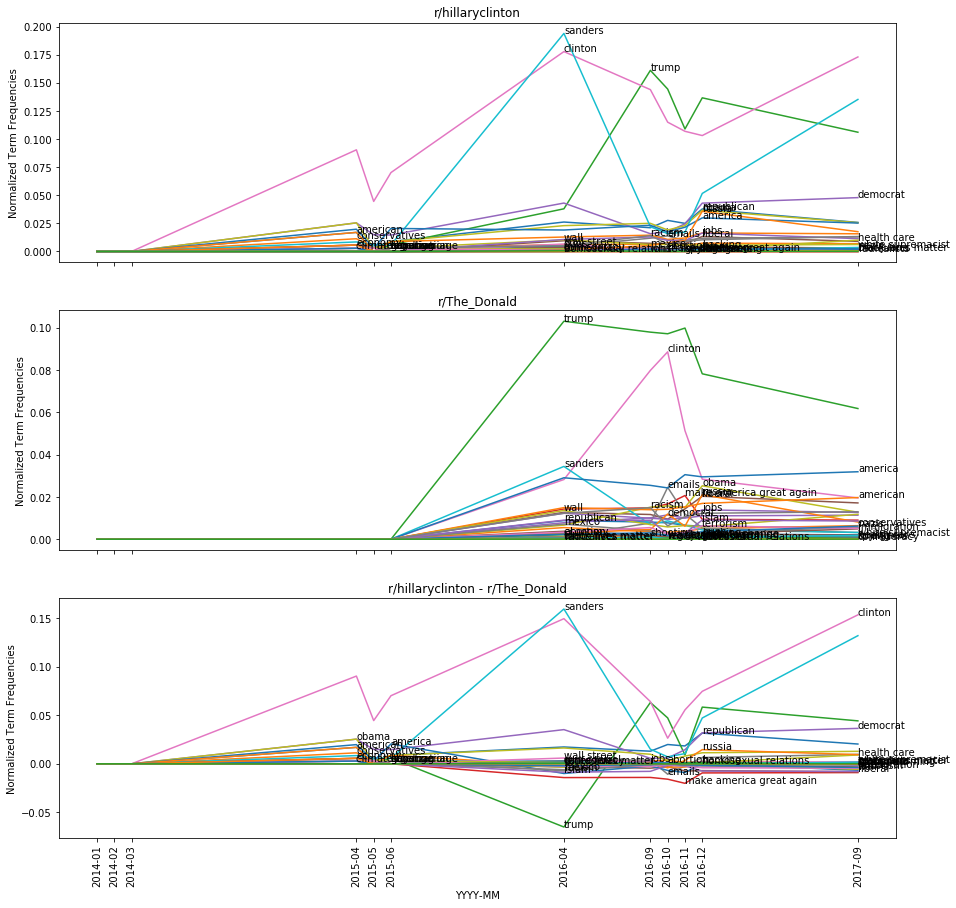

In [10]:
compare_subreddits('hillaryclinton', 'The_Donald')

As is expected, *r/hillaryclinton* has a far higher rate of mentions of both Hillary Clinton and Bernie Sanders (though interestingly enough at its peak Sanders is mentioned more than is Clinton at her peak. *r/The_Donald* in comparison has a higher frequency of comments with mention of Trump, staying consistently high from the subreddit's inception. Terms like "America" and "American" have higher mention rates overall in the Trump-based subreddit than in Clinton's. Viewing the differences chart (the third one) lets one see each subreddit's most important terms. Terms like "Republican" and "Democrat" appear more often in *r/hillaryclinton* and "make america great again" and "emails" appear more often in *r/The_Donald*.

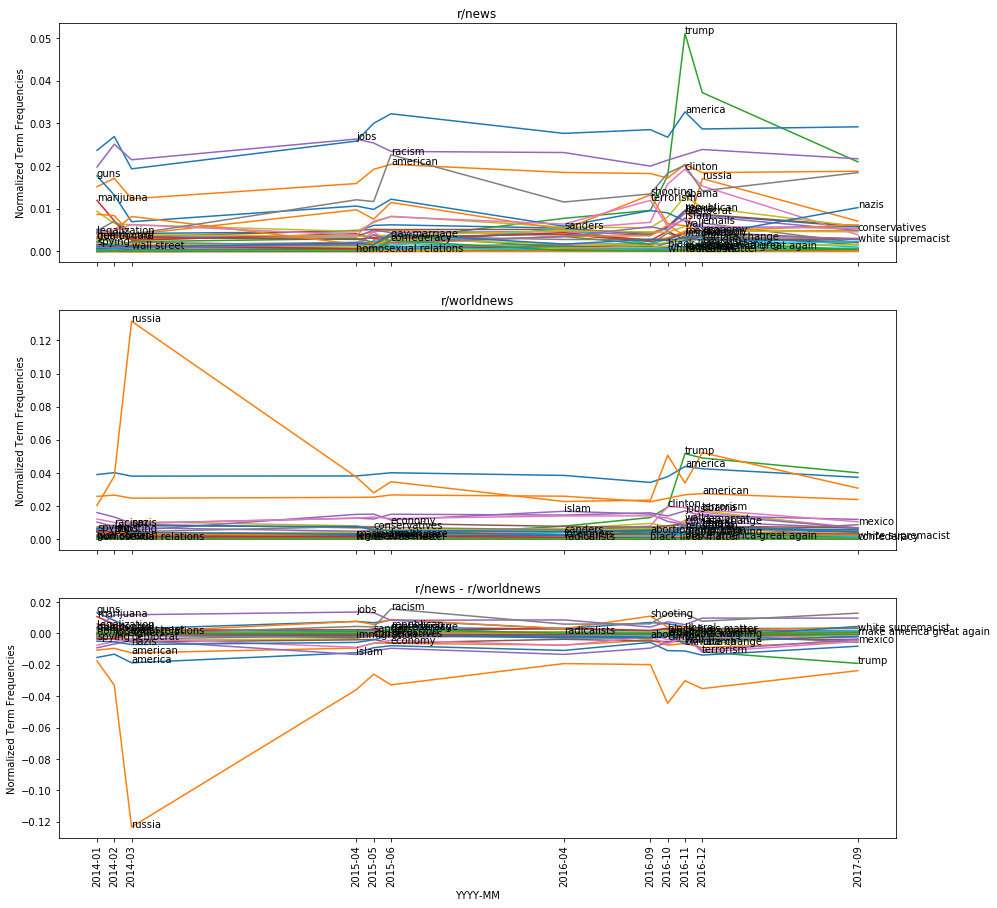

In [11]:
compare_subreddits('news', 'worldnews')

Divides can also be seen between *r/news* and *r/worldnews*. During the month of the election (2016-11), mentions of Trump and America peak (also note the slight peak of comments mentioning Russia in both subreddits in the months following the election). Mentions of Russia show a clear peak in March 2014 in the *r/worldnews* subreddit, during their sudden annexation of Crimea. Note that *r/worldnews* focuses primarily on news events outside the United States, while *r/news* focuses solely on news events within the United States.

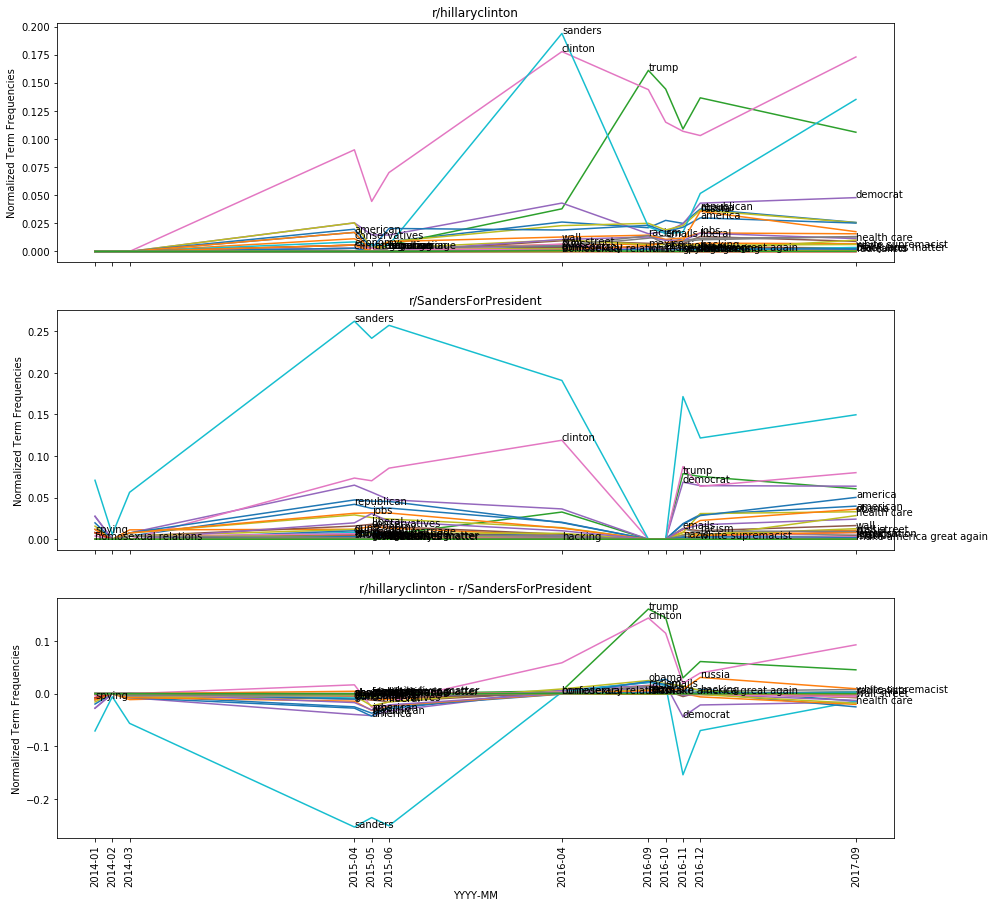

In [12]:
compare_subreddits('hillaryclinton', 'SandersForPresident')

Next, we compare frequencies between the two primary Democratic candidates: *r/hillaryclinton* for Hillary Clinton and *r/SandersForPresident* for Bernie Sanders. Mentions of both Hillary Clinton and Bernie Sanders peaks in their respective subreddits in April 2015, when both announced their candidacy for office. (There is a gap in the data for *r/SandersForPresident* during the months of September and October 2016. I do not know what caused it.)

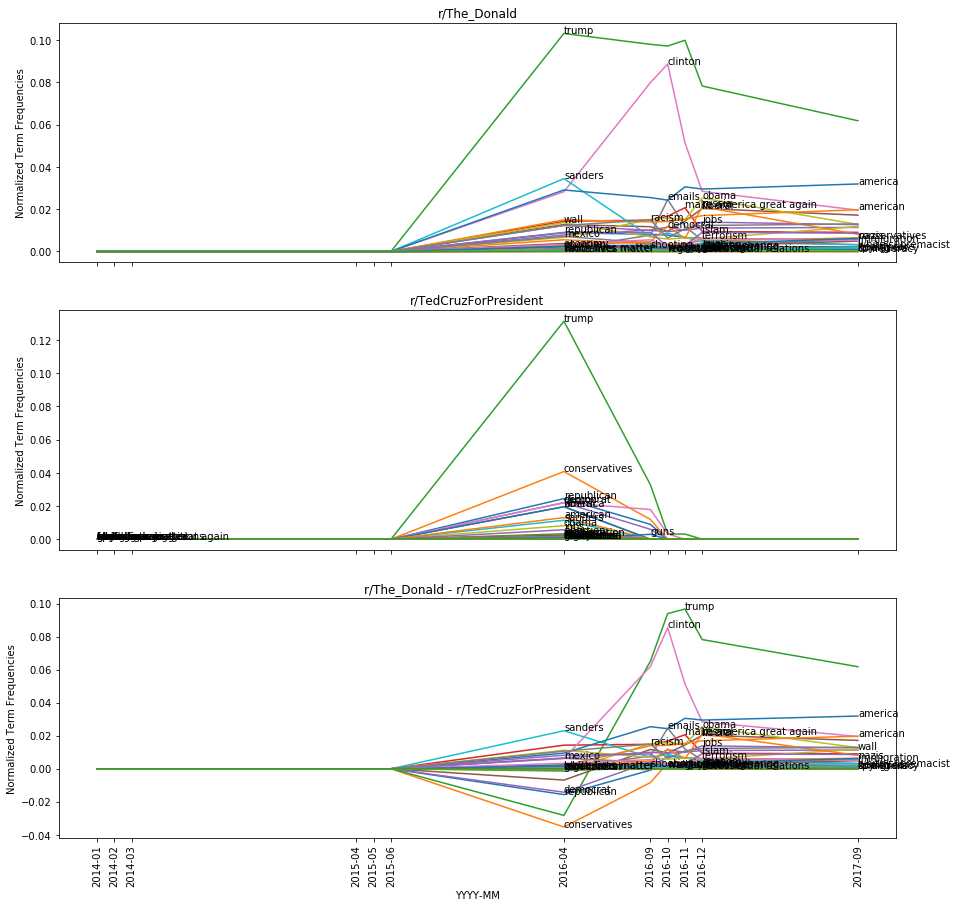

In [13]:
compare_subreddits('The_Donald', 'TedCruzForPresident')

In parallel, we can compare the graphs between the two primary Republican candidates: *r/TheDonald* for Donald Trump and *r/TedCruzForPresident* for Ted Cruz. Interesting to note here is the prominence of mentions of Trump, even in the subreddit dedicated to Ted Cruz. Within *r/TedCruzForPresident* as well, there are more mentions of "conservatives" and "Republicans", perhaps displaying the more serious and relevant nature of his subreddit to Trump's. Also note the sudden decline in comments in *r/TedCruzForPresident* following Cruz's withdrawal of his candidacy.

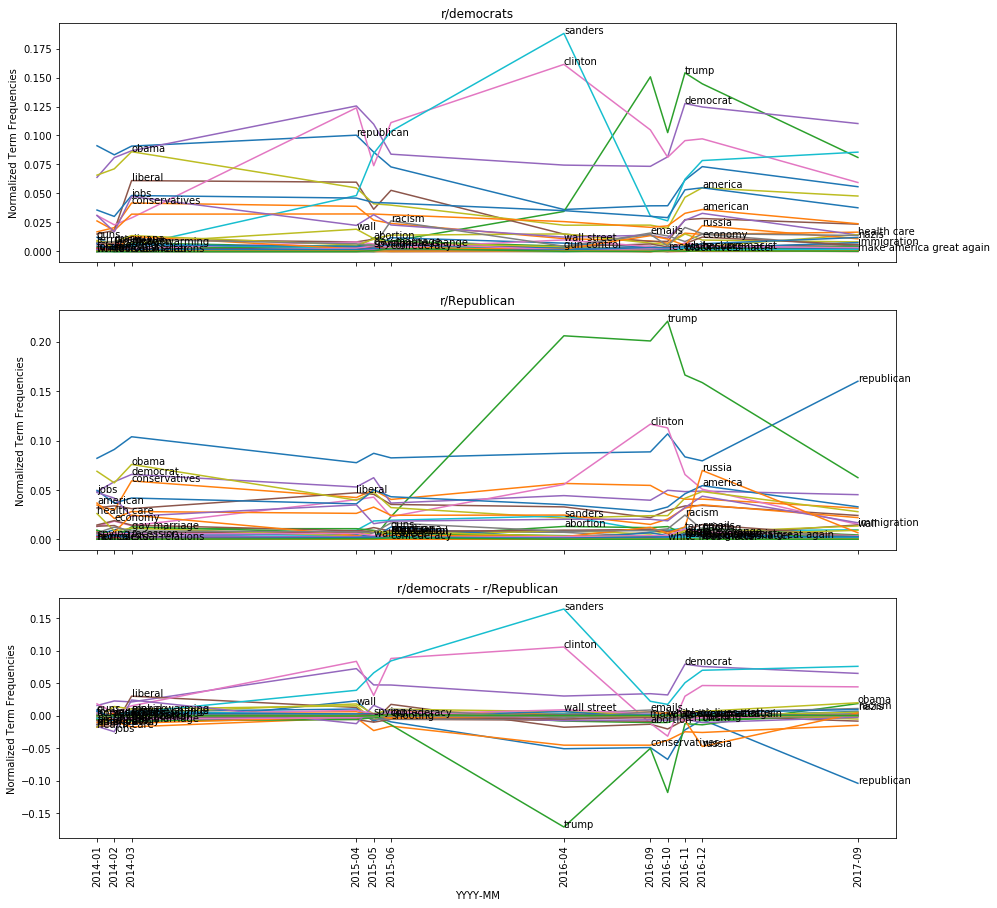

In [14]:
compare_subreddits('democrats', 'Republican')

There is little to note between *r/democrats* and *r/Republican*, each of which represent their respective party. Both's most frequent terms relate to their party, top candidates, and politcal ideology. Perhaps the only thing to notice is how frequently Bernie Sanders is mentioned in *r/democrats* (moreso than even Hillary) and how little Ted Cruz is mentioned in *r/Republican*, being far out-paced by Trump.

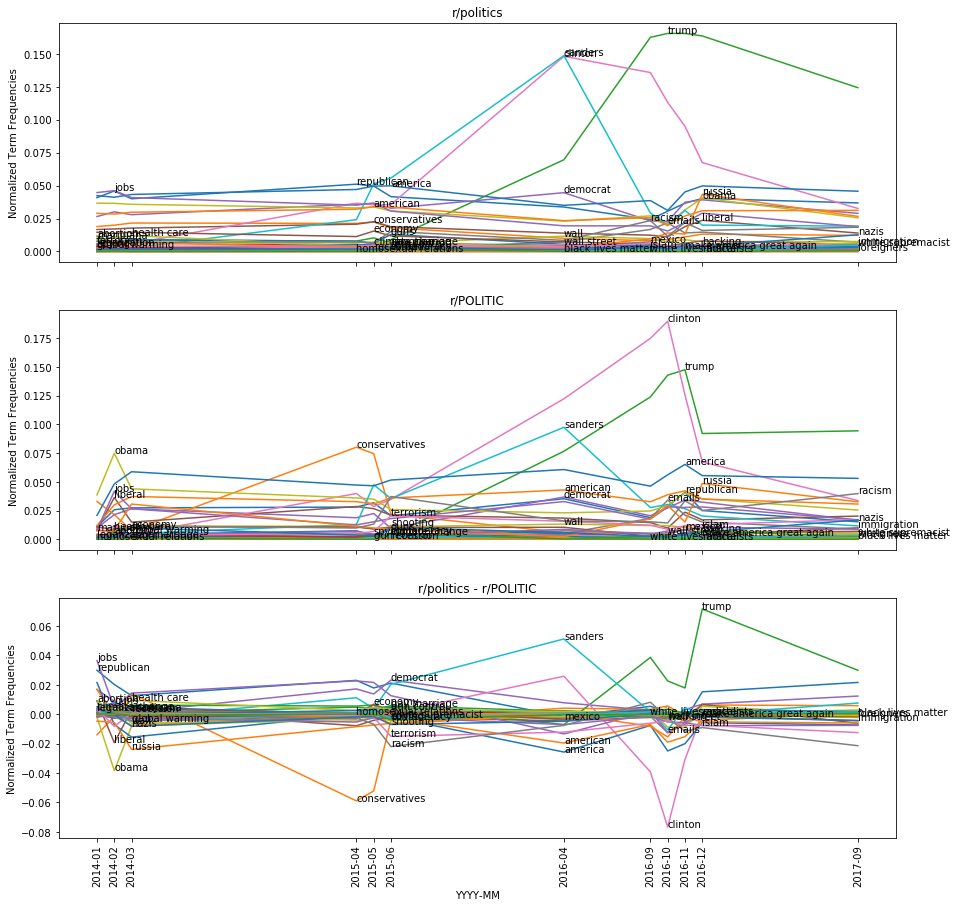

In [15]:
compare_subreddits('politics', 'POLITIC')

*r/politics* and *r/POLITIC* are poth purely political subreddits, though *r/POLITIC* claims to be unfettered by political correctness and is thus less restrained that *r/politics*. In practice, this appears to translate to a slight left-leaning to *r/politics* and a slight right-leaning to *r/POLITIC*, as presented by the mentions of "democrats" and Sanders in the former and mentions of "conservatives" and perhaps attacks of Clinton in the latter.

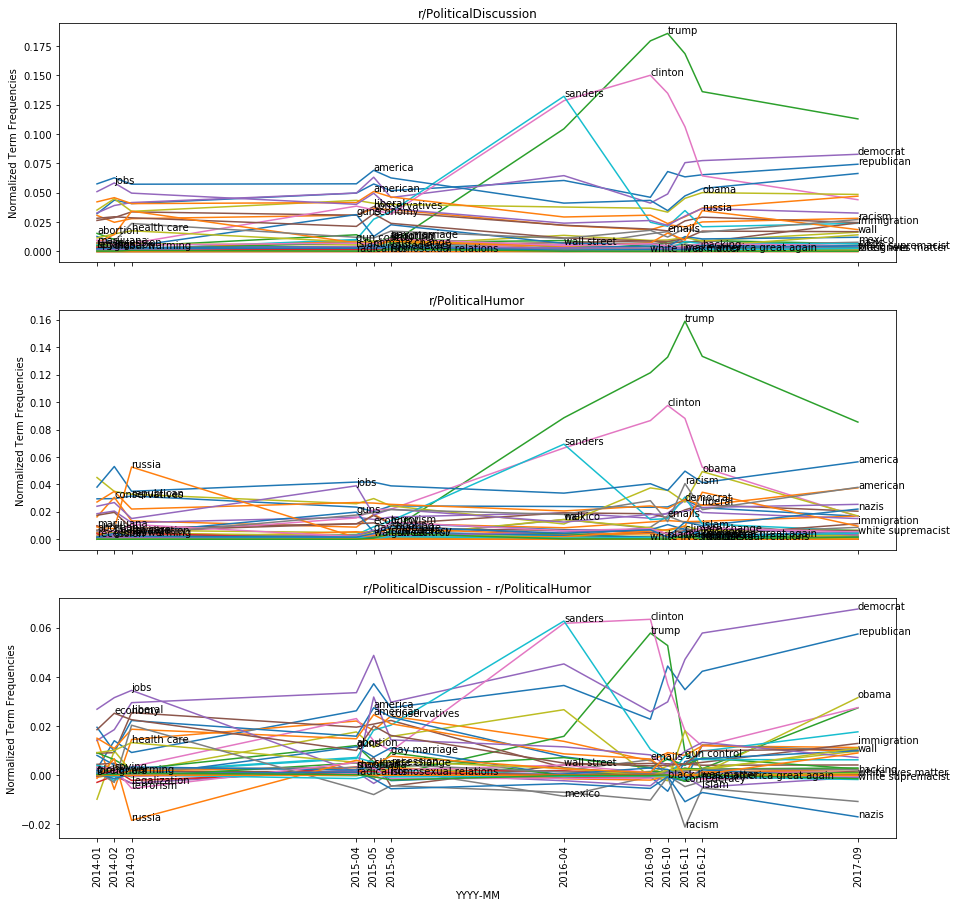

In [16]:
compare_subreddits('PoliticalDiscussion', 'PoliticalHumor')

By comparing the serious subreddit *r/PoliticalDiscussion* and its humorous counterpart *r/PoliticalHumor*, we see very similar frequency distributions. However, upon looking at the differences chart between the two, one notices a stronger divide. The former has higher frequencies of primarily actual political concepts like politcal parties and candidates and serious political issues; the latter has higher frequencies of more emotional issues, like Russia, Mexico, and later on racism and nazis/neo-nazis. Such a divide could be expected between such different types of subreddits.

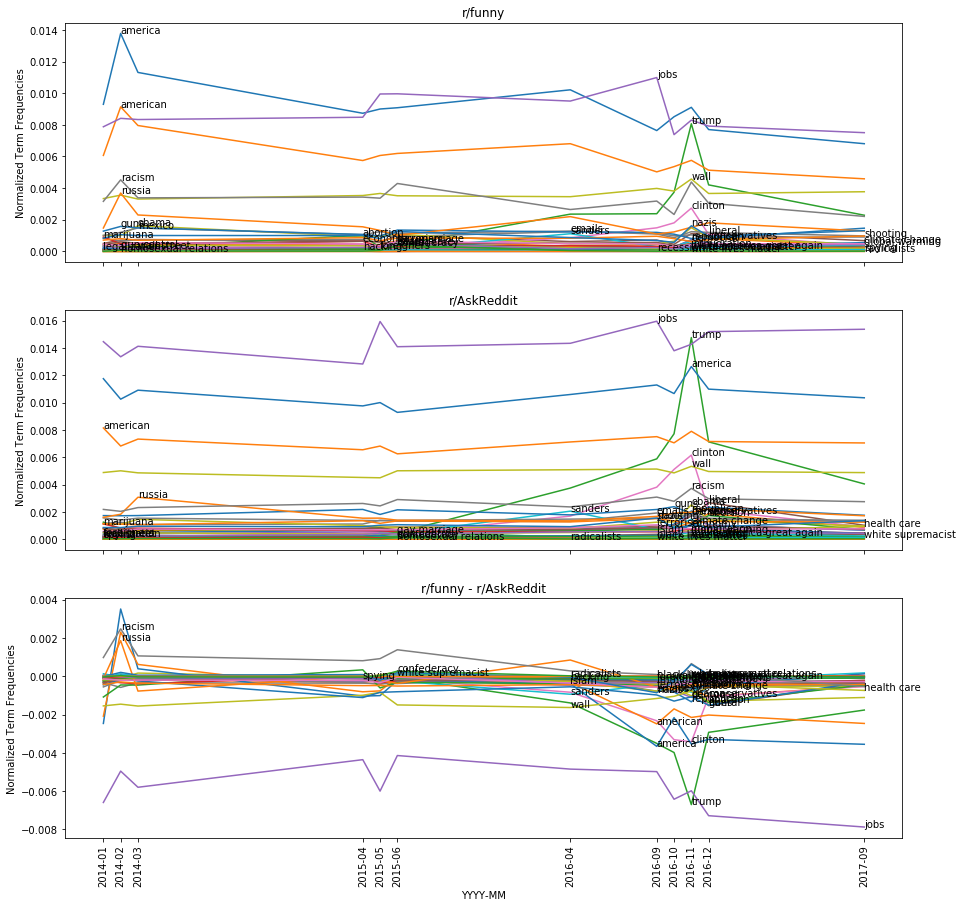

In [17]:
compare_subreddits('funny', 'AskReddit')

Finally, a comparison is made between *r/funny* and *r/AskReddit*. These were chosen because neither are especially political subreddits, but both are extremely popular (the top two subreddits, inversely). Though the frequency of political mentions in both is an order of magnitude smaller than the other subreddits compared, they both have very similar overall ratios. Both peak strongly during Trump's election month (though *r/AskReddit* peaks far more, perhaps referring to questions asked like "What are you going to do now that Trump is elected?"). Moreover, both strongly mention jobs, though *r/AskReddit* mentions jobs more than does *r/funny*; this is more likely to refer to asking other redditors about each other's jobs than it is to refer to the growth of jobs in the economy following political party visions.

I hope that it is obvious to see from these few data points across only twelve months and fifteen subreddits that political opinions can indeed be tracked via subreddit comment data. Though the data seen here may not show any surprising trends, it does indeed follow closely real time events among respective political communities. With further extension, in the number of months, subreddits, and political terms, I believe that further inferences can be made.

Below, further analysis is made, but instead of focusing on each subreddit's change over time, we are going to focus on the prominence of each terms' appearance in each subreddit at a certain point of time. In effect, we are taking the graphs displayed above and looking at them straight on, as a single layer in the data.

In [18]:
def extract_word_frequencies_from_subreddits(word, month):
    """
    Return a list of term-frequencies of subreddits per regular expression in a given month
    
    :param word: a string representing the regex whose terms' frequencies are to be extracted
    :param month: a string representing the given month whose comments are being examined
    :return subreddit_frequencies:
    """
    
    month_frequencies = frequencies[csv_files.index(month)]
    
    subreddit_frequencies = []
    for subreddit in political_subreddits:
        subreddit_frequencies.append(month_frequencies.at[word, subreddit])
        
    return subreddit_frequencies

In [19]:
def compare_word_snapshots(term, month1, month2):
    """
    Plots the frequencies of a term's appearance in two different month's worth of subreddits.
    
    :param term: 
    :param month1: 
    :param month2: 
    :return: plots showing the frequencies of two months, followed by the change between
    """
    
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(15,5))
    fig.canvas.draw()
    
    # make them pretty
    ax1.set_title("{} for r'{}'".format(month1, term))
    ax1.set_xlabel('Subreddit')
    ax1.set_ylabel("Normalized Term Frequencies")
    ax1.set_xticks(range(len(political_subreddits)))
    ax1.set_xticklabels(political_subreddits, rotation='vertical')
    
    ax2.set_title("{} for r'{}'".format(month2, term))
    ax2.set_xlabel('Subreddit')
    ax2.set_ylabel("Normalized Term Frequencies")
    ax2.set_xticks(range(len(political_subreddits)))
    ax2.set_xticklabels(political_subreddits, rotation='vertical')    
    
    ax3.set_title("Change between {} and {} for r'{}'".format(month2, month1, term))
    ax3.set_xlabel('Subreddit')
    ax3.set_ylabel("Normalized Term Frequencies")
    ax3.set_xticks(range(len(political_subreddits)))
    ax3.set_xticklabels(political_subreddits, rotation='vertical')
    
    # subreddit 1 graph
    month1_freq = extract_word_frequencies_from_subreddits(term, month1)
    ax1.bar(np.arange(len(political_subreddits)), month1_freq, align='center', alpha=0.5)
    
    # subreddit 2 graph
    month2_freq = extract_word_frequencies_from_subreddits(term, month2)
    ax2.bar(np.arange(len(political_subreddits)), month2_freq, align='center', alpha=0.5)
        
    # subreddit 2 - subreddit 1 graph
    sub1sub2 = [b - a for a,b in zip(month1_freq, month2_freq)]
    ax3.bar(np.arange(len(political_subreddits)), sub1sub2, align='center', alpha=0.5)

    plt.show()

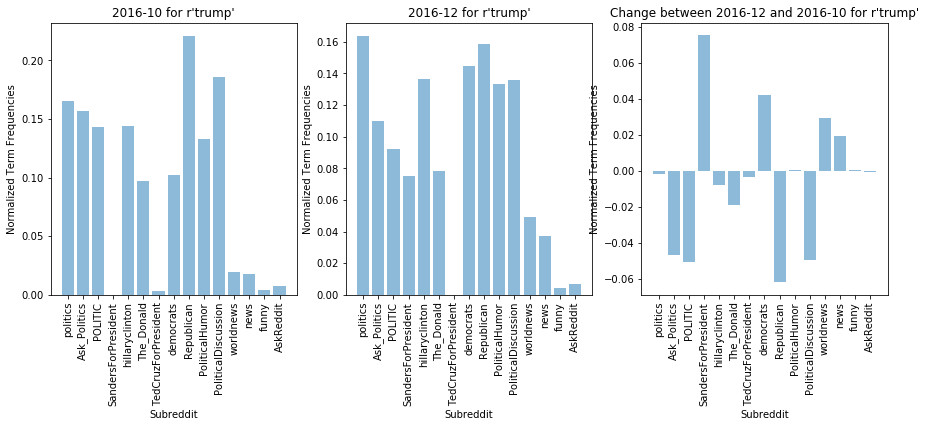

In [20]:
compare_word_snapshots(political_words[2], '2016-10', '2016-12')  # r'trump'

Each of the graphs above display the frequencies of comments that contained the term 'Trump' for the months before and after the month of the election, as well the the change of the frequencies between the two. It is the change that is important in this glance of the data. In the month following the election, mentions of Trump occurred more frequently than before in the Democrat subreddits *r/SandersForPresident* and *r/democrats*, while interstingly enough, mentions occurred less frequently in more neutral political subreddits, as well as *r/Republican*.

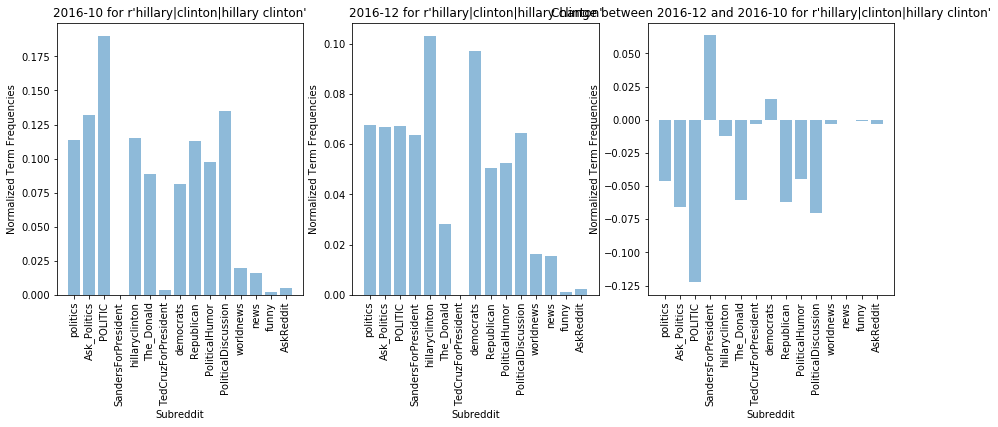

In [21]:
compare_word_snapshots(political_words[6], '2016-10', '2016-12')  # r'clinton'

Also interesting is the same change that can be found for mentions of Hillary Clinton during the same months in the same subreddits.

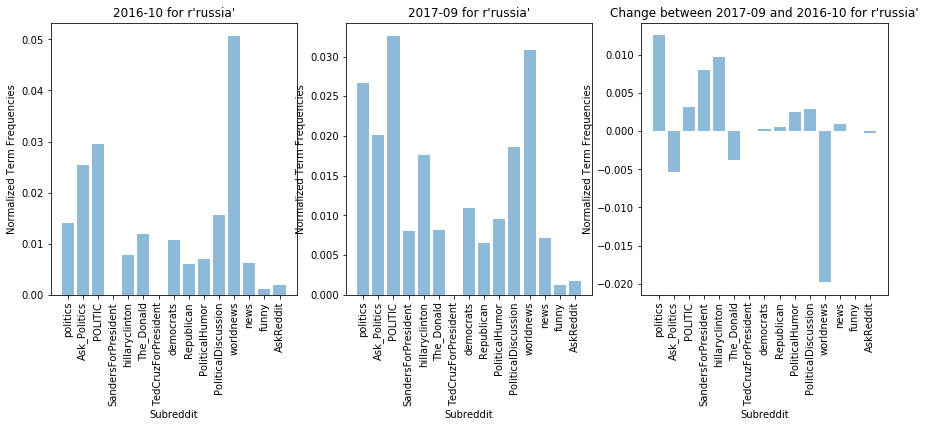

In [22]:
compare_word_snapshots(political_words[31], '2016-10', '2017-09')  # r'russia'

As seen here, in the months before the election, mentions of "Russia" featured mostly in the *r/worldnews* subreddit, most likely over Russia's hacking of the DNC during that time. In comparison, as of almost a year later, Russia is more discussed about in the political subreddits in general, mostly given to the recent possible evidence of Trump-Russia collusion and their being talked about more in the media.

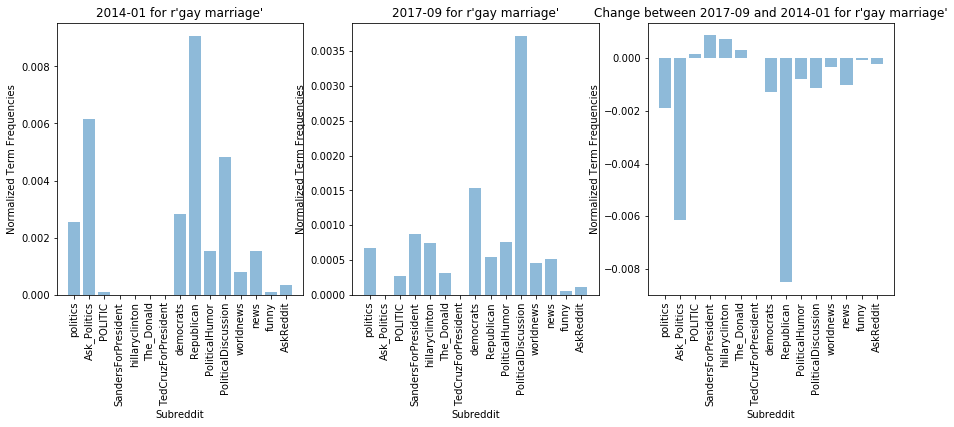

In [23]:
compare_word_snapshots(political_words[22], '2014-01', '2017-09')  # r'gay marriage'

Breaking away from presidential politics, by comparing mentions of "gay marriage" as of January 2014 to last September, we can see the rapid acceptance of the institution from before and after its legalization, after only a couple of years. Most significantly, one can notice the strong decrease of mentions of the subject in *r/Republican*, displaying the loss of gay marriage as an important political issue for their party.

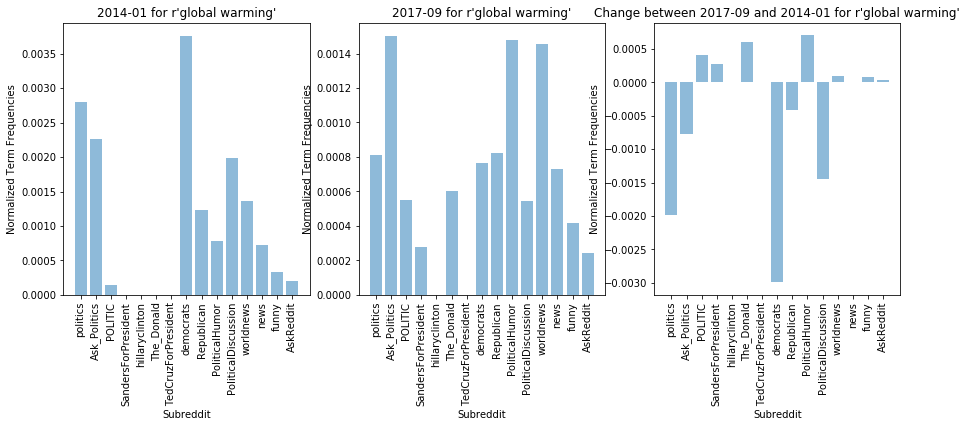

In [24]:
compare_word_snapshots(political_words[29], '2014-01', '2017-09')  # r'global warming'

Let's also view the marked difference between mentions of "global warming" since 2014. In general, mention of it is down in every subreddit iterated through here, minus a few odd exceptions. In comparison...

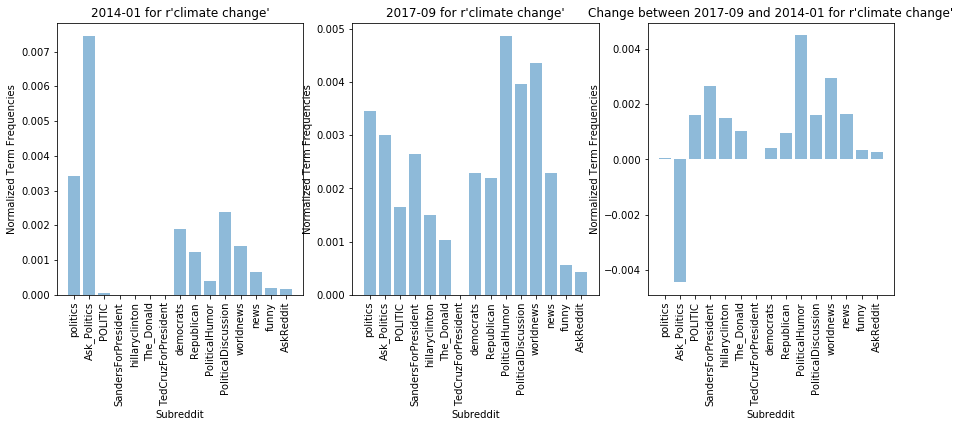

In [25]:
compare_word_snapshots(political_words[30], '2014-01', '2017-09')  # r'climate change'

Mentions of "climate change" are much more popular now than then. This may demonstrate the shift in notation that has occurred over the past few years regarding the idea of our planet's warming. The euphemism "climate change" is more passive, and as such has proved more popular among the masses in recent months, than "global warming." The only example of this not holding true is its far higher popularity in *r/Ask_Politics*, for what reason I do not know.

We can also view the plots of subreddit's term-frequencies across two months.

In [26]:
def extract_subreddit_frequencies_from_words(subreddit, month):
    """
    Return a list of term-frequencies of regular expressions per subreddit in a given month
    
    :param subreddit: a string representing the subreddit whose terms' frequencies are to be extracted
    :param month: a string representing the given month whose comments are being examined
    :return word_frequencies: plots showing the frequencies of two months, followed by the change between
    """

    month_frequencies = frequencies[csv_files.index(month)]
    
    word_frequencies = []
    for word in political_words:
        word_frequencies.append(month_frequencies.at[word, subreddit])
        
    return word_frequencies

In [27]:
def compare_subreddit_snapshots(subreddit, month1, month2):
    """
    Plots the frequencies of a term's appearance in two different month's worth of subreddits.
    
    :param term: 
    :param month1: 
    :param month2: 
    :return: plots showing the frequencies of two months, followed by the change between
    """
    
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(21,5))
    fig.canvas.draw()
    
    # make them pretty
    ax1.set_title('{} for r/{}'.format(month1, subreddit))
    ax1.set_xlabel('Word')
    ax1.set_ylabel("Normalized Term Frequencies")
    ax1.set_xticks(range(len(political_words)))
    ax1.set_xticklabels(word_renames, rotation='vertical')
    
    ax2.set_title('{} for r/{}'.format(month2, subreddit))
    ax2.set_xlabel('Word')
    ax2.set_ylabel("Normalized Term Frequencies")
    ax2.set_xticks(range(len(political_words)))
    ax2.set_xticklabels(word_renames, rotation='vertical')    
    
    ax3.set_title("Change between {} and {} for r/{}".format(month2, month1, subreddit))
    ax3.set_xlabel('Word')
    ax3.set_ylabel("Normalized Term Frequencies")
    ax3.set_xticks(range(len(political_words)))
    ax3.set_xticklabels(word_renames, rotation='vertical')
    
    # subreddit 1 graph
    month1_freq = extract_subreddit_frequencies_from_words(subreddit, month1)
    ax1.bar(np.arange(len(political_words)), month1_freq, align='center', alpha=0.5)
    
    # subreddit 2 graph
    month2_freq = extract_subreddit_frequencies_from_words(subreddit, month2)
    ax2.bar(np.arange(len(political_words)), month2_freq, align='center', alpha=0.5)
        
    # subreddit 2 - subreddit 1 graph
    sub1sub2 = [b - a for a,b in zip(month1_freq, month2_freq)]
    ax3.bar(np.arange(len(political_words)), sub1sub2, align='center', alpha=0.5)

    plt.show()

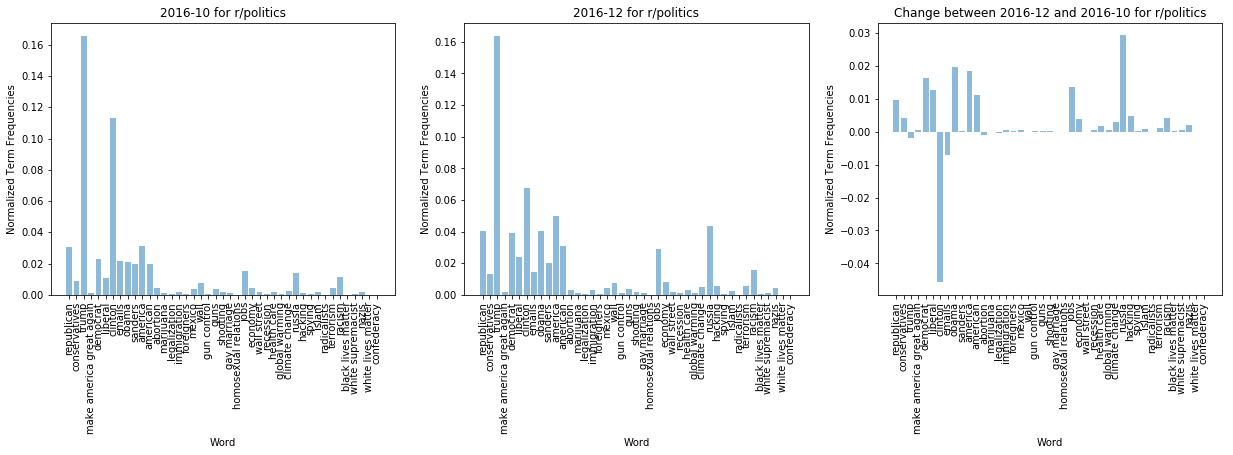

In [28]:
compare_subreddit_snapshots('politics', '2016-10', '2016-12')

In these charts, we can compare the change of mentions of certain words over two months in a single subreddit. Above, we have graphs for the months before and after the election for *r/politics*, the main political subreddit. Overall, mentions of Hillary strongly decrease following the election, while mentions of "hacking" rise strongly, amongst early revelations of Russian involvement in the election.

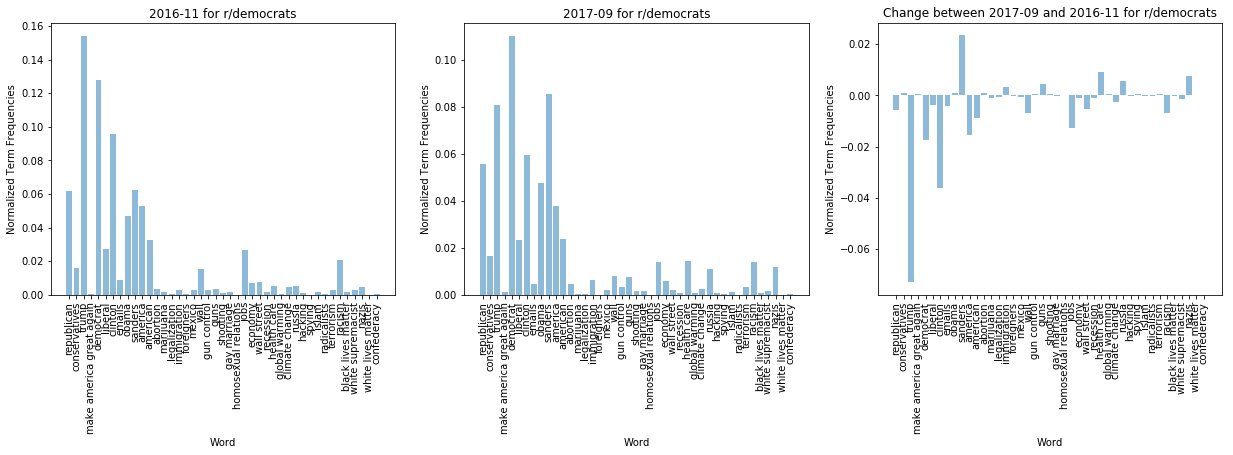

In [29]:
compare_subreddit_snapshots('democrats', '2016-11', '2017-09')

For mentions of these words in *r/democrats* between the month of the election and September 2017, almost all frequencies decrease, especially the number of those mentioning Trump and Clinton. In comparison, the only term with a strong increase is that mentioning Bernie Sanders.

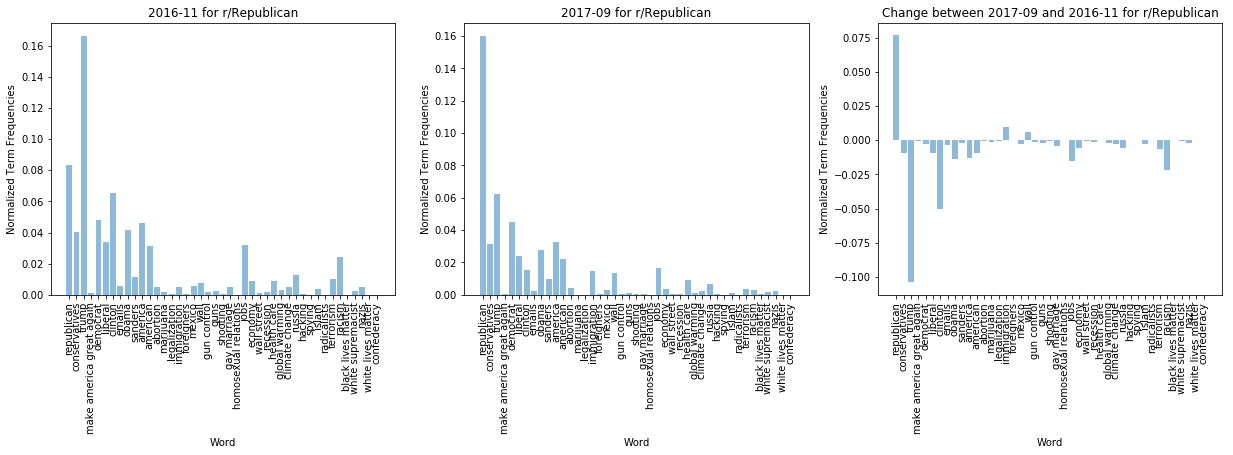

In [30]:
compare_subreddit_snapshots('Republican', '2016-11', '2017-09')

Similar results can be seen for *r/Repbulican*, although mentions of their own party strongly increased between these two periods of time.

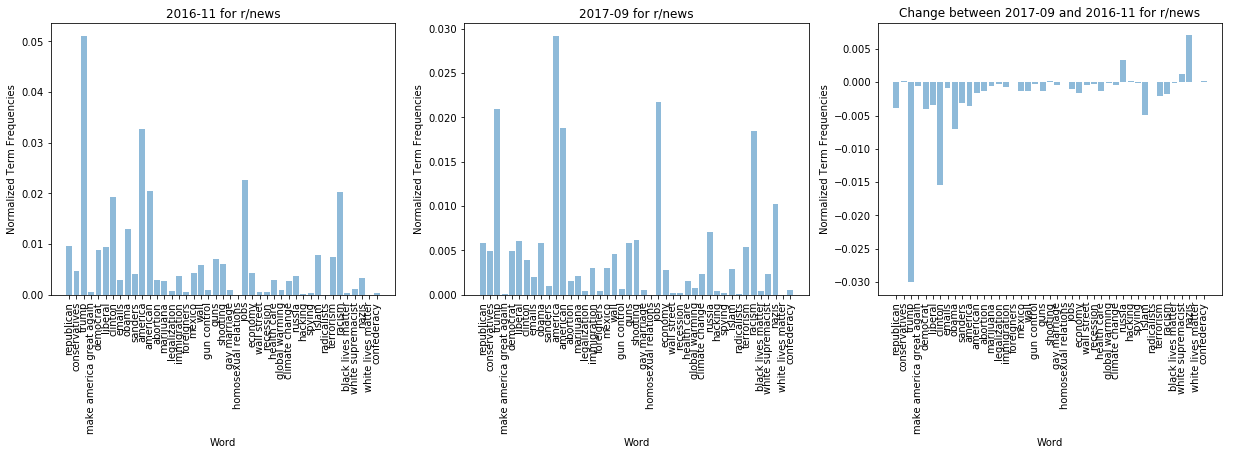

In [31]:
compare_subreddit_snapshots('news', '2016-11', '2017-09')

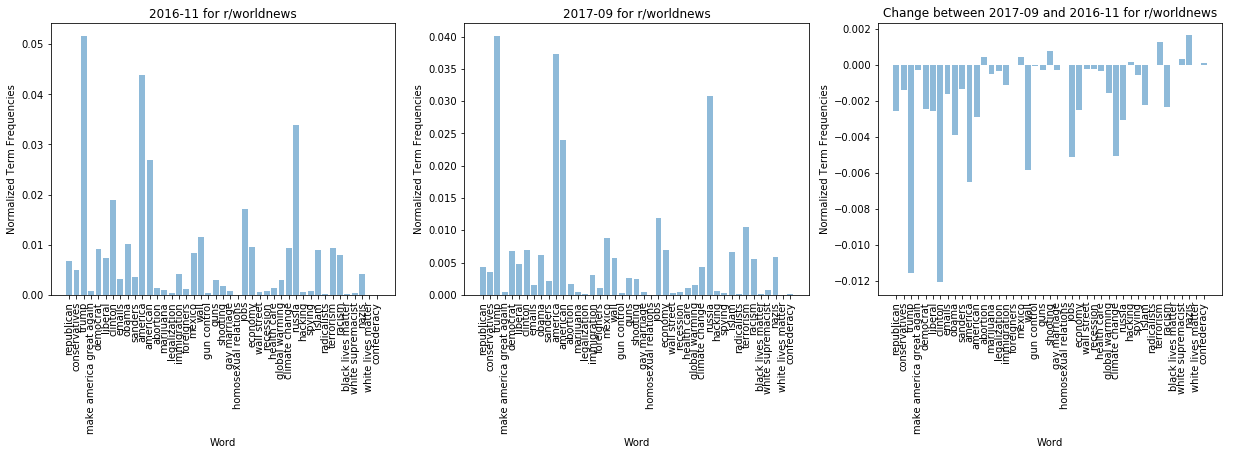

In [32]:
compare_subreddit_snapshots('worldnews', '2016-11', '2017-09')

In the year following the elections, mentions fell strongly of the candidates in both *r/news* and in *r/worldnews*, where mentions of more general issues that would have arisen in the campaign also fall. The only word that makes a strong comeback in both subreddits is "nazis," referencing the rise of reports of white supremacy and neo-Naziism that occurred only recently during that month. 

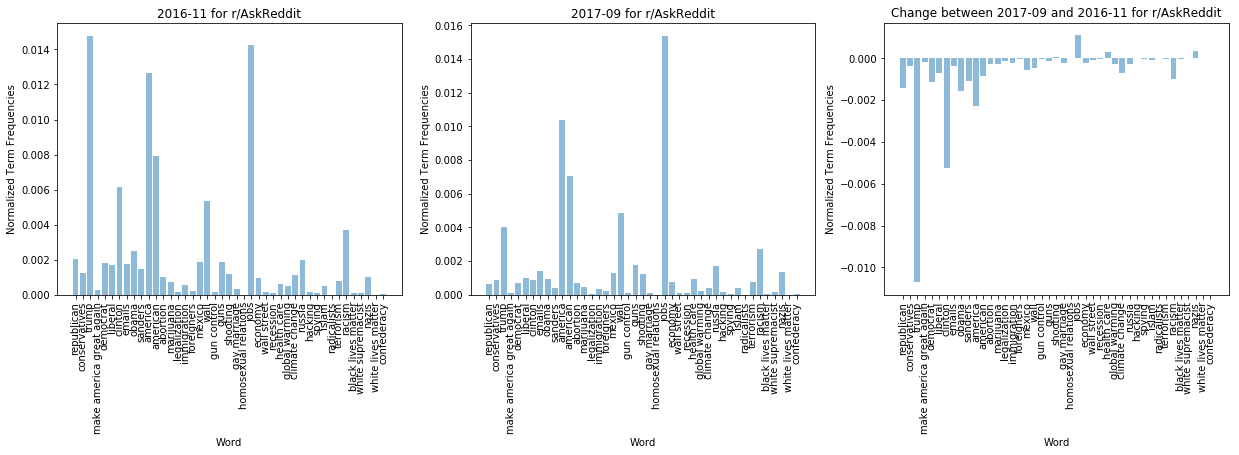

In [33]:
compare_subreddit_snapshots('AskReddit', '2016-11', '2017-09')

As for the general and most popular subreddit *r/AskReddit*, mentions of all topics fell strongly, minus that of "jobs," which rose slightly. When comparing such a vast time span following the election, drastic declines in frequencies are expected for most subreddits, so nothing mentioned across the last few plots should be surprising.

### Conclusion
I hope that the plots of all three types that I have presented above show the efficacy (or at least legitimacy) of using such a method to view the changes of relevance of certain concepts among the general American public in the time around the 2016 presidential election. By expanding the data across a finer timeline, and by more effectly determining subreddits and political terms of importance, I hope greater insights can be made. Through further comparison between just the results I now have access to already, I believe interesting trends and unexpected transitions could be ascertained. Expansion would solely facilitate in this process. Regardless of whether expansion does indeed continue, it should be evident that Reddit comment data does indeed at least partially reflect the views of the general public when it comes to ideas in politics.

For a final thought, let's incorporate an element of extension into this process. Given changes of frequencies of certain words marking a trend in politics, by measuring the mentions of these words in real time, we can make predictions of the impact of events on the views of Americans (or of the world in general if focusing on non-American subreddits). For example, let's hypothesize a scenario for the future. Let's say we have utilized the Reddit API and are actively streaming in comments from *r/Democrat* in real-time. The comments show a strong increase of mentions of some political issue *P*, an increase that parallels the increase of mentions of some other political issue *Q* in the past, right before the party explicitly added issue *Q* to their official stance. We can predict that the party's view of issue *P* is similar, and as such they are about to endorse this issue now as well. By comparing the change in growth of comment frequency to those in the past during politically salient moments of history, we can find parallels that can be automatically extracted and inferred using machine learning methods.

Though the appearance of this hypothetical scenario is subject, the efficacy of this thought-experiment in general provides a strong reason to consider extending this research further and in more varied ways, as I hope to do in the Data Incubator.